In [126]:
import pandas as pd
import numpy as np

events = pd.read_csv("/home/fedoremelianenko/FIUBA/Organizacion de datos/TP1/data/events.csv",usecols=['date', 'device_language'])

In [127]:
events['sum'] = 1
events.head()

,date,device_language,sum
0,2019-03-05 00:09:36.966,4.077062e+17,1
1,2019-03-05 00:09:38.920,4.077062e+17,1
2,2019-03-05 00:09:26.195,4.077062e+17,1
3,2019-03-05 00:09:31.107,4.077062e+17,1
4,2019-03-09 21:00:36.585,3.301378e+18,1


In [140]:
idiomas = events['device_language'].value_counts()
idiomas.head()

6.977049e+18    745898
3.301378e+18    589865
9.028383e+18    388832
6.804428e+18    340624
4.621024e+18    150143
Name: device_language, dtype: int64

In [129]:
idiomas.shape[0]

186

In [141]:
events.head()
events_grouped = events.groupby(['device_language']).agg({'sum':'sum'})
events_grouped.head()

,sum
device_language,
2.025809e+16,15
5.765279e+16,8
1.101539e+17,845
1.771033e+17,5
2.067660e+17,1


In [131]:
top6_idiomas = events_grouped.nlargest(6,'sum','all')
top6_idiomas = top6_idiomas.reset_index()
top6_idiomas

,device_language,sum
0,6.977049e+18,745898
1,3.301378e+18,589865
2,9.028383e+18,388832
3,6.804428e+18,340624
4,4.621024e+18,150143
5,4.077062e+17,53277


In [132]:
bottom180_idiomas = events_grouped.nsmallest(180,'sum','all')
bottom180_idiomas = bottom180_idiomas.reset_index()
bottom180_idiomas['sum'].sum()

137965

In [133]:
top6_idiomas = top6_idiomas.append({'device_language':'Otro', 'sum':bottom180_sum}, ignore_index=True)
top6_idiomas.set_index(keys='device_language', inplace=True)
top6_idiomas

,sum
device_language,
6.97704925356e+18,745898
3.30137777598e+18,589865
9.0283826551e+18,388832
6.80442793598e+18,340624
4.62102405309e+18,150143
4.07706219895e+17,53277
Otro,137965


(-1.2288084620292496,
 1.165035541794796,
 -1.1608253104535333,
 1.2019685347412474)

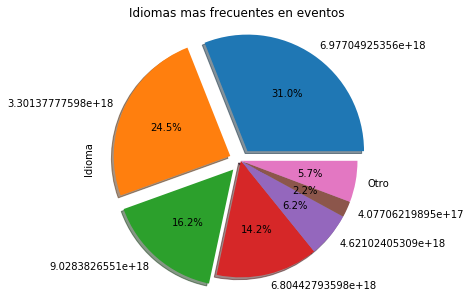

In [139]:
explode = [0.1,0.1,0.1,0,0,0,0]
ax = top6_idiomas.plot.pie(label='Idioma', shadow = True, autopct='%1.1f%%', y='sum', explode = explode,
                           legend=False,title='Idiomas mas frecuentes en eventos', figsize=(5,5))
ax.axis('equal')